## 1. Using iterators in PythonLand

### Iterators

- Iterating with a for loop
- Iterable
    - list, string, dict, file connections
    - object associated iter() method
    - applying iter() to an iterable iterator

- Iterator
    - produce next value with next()

In [1]:
employees = ['Nick', 'Lore', 'Hugo']

for employee in employees:
    print(employee)

Nick
Lore
Hugo


In [2]:
for i in range(4):
    print(i)

0
1
2
3


#### Iterating over iterables : next() - string

In [3]:
word = 'Da'
it = iter(word)
next(it)

'D'

In [4]:
next(it)

'a'

In [5]:
next(it)

StopIteration: 

In [6]:
word = 'Data'
it = iter(word)
print(*it)

D a t a


In [7]:
print(*it)

In [8]:
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# for person in flash:
#     print(person)

supehero = iter(flash)

print(next(supehero))
print(next(supehero))
print(next(supehero))
print(next(supehero))

jay garrick
barry allen
wally west
bart allen


In [6]:
small_value = iter(range(3))

print(next(small_value))
print(next(small_value))
print(next(small_value))

# for num in range(3):
#     print(num)

googol = iter(range(10 ** 100))

print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
0
1
2
3
4


#### Iterating over dictionaries

In [9]:
pythonistas = {'hugo':'bowne-anderson', 'francis':'castro'}

for key, value in pythonistas.items():
    print(key, value)

hugo bowne-anderson
francis castro


#### Iterating over file connections

In [10]:
file = open('file.txt')
it = iter(file)
print(next(it))

nia ulan sari



#### Iterators as function arguments

In [11]:
values = range(10, 21)
print(values)

value_list = list(values)
print(value_list)

value_sum = sum(values)
print(value_sum)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


### Playing with iterators

#### Using enumerate()

In [12]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
e = enumerate(avengers)

In [13]:
e_list = list(e)
print(e_list)

[(0, 'hawkeye'), (1, 'iron man'), (2, 'thor'), (3, 'quicksilver')]


#### enumerate() and unpack

In [14]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
for index, value in enumerate(avengers):
    print(index + 1, value)

print()

for index, value in enumerate(avengers, start=10):
    print(index, value)

1 hawkeye
2 iron man
3 thor
4 quicksilver

10 hawkeye
11 iron man
12 thor
13 quicksilver


#### Using zip()

In [24]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']

z = zip(avengers, names)
print(type(z))

<class 'zip'>


In [25]:
z_list = list(z)
print(z_list)

[('hawkeye', 'barton'), ('iron man', 'stark'), ('thor', 'odinson'), ('quicksilver', 'maximoff')]


In [26]:
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']

mutant_list = list(enumerate(mutants))
print(mutant_list)

for index1, value1 in enumerate(mutants):
    print(index1, value1)

for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [10]:
x = ['nia', 'ulan', 'sari']
y = ['arief', 'budi', 'mulia']
z = ['pipi', 'susanti']

nama = list(zip(x, y, z))
nama_zip = zip(x, y, z)
nama_zip

for nilai1, nilai2, nilai3 in nama_zip:
    print(nilai1, nilai2, nilai3)

nia arief pipi
ulan budi susanti


In [29]:
x = ('nia', 'ulan', 'sari')
y = ('arief', 'budi', 'mulia')

#Zip
z1 = zip(x, y)
print(*z1)

#Unzip
z1 = zip(x, y)
result1, result2 = zip(*z1)

print(result1)
print(result2)
print(result1 == x)
print(result2 == y)

('nia', 'arief') ('ulan', 'budi') ('sari', 'mulia')
('nia', 'ulan', 'sari')
('arief', 'budi', 'mulia')
True
True


### Using iterators to load large files into memory

- Jika ada data yang terlalu besar, maka pengerjaannya dapat dibagi menjadi beberapa bagian kecil menggunakan iterator

In [33]:
import pandas as pd

counts_dict = {}

for chunk in pd.read_csv('tweets.csv', chunksize=10):

    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


In [42]:
def count_countries(csv_file, c_size, colname):
    counts_dict = {}

    for chunk in pd.read_csv(csv_file, chunksize=c_size):
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1
    return counts_dict

result_counts = count_countries('tweets.csv', 10, 'lang')
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


## 2. List comprehensions and generators

### List comprehensions

- Mempersingkat for loop menjadi single line

In [50]:
#For loop example
nums = [12, 8, 21, 3, 16]
new_nums = []
for nums in nums:
    new_nums.append(nums + 2)
print(new_nums)

[14, 10, 23, 5, 18]


In [51]:
#List comprehension example
nums = [12, 8, 21, 3, 16]
new_nums = [nums + 2 for nums in nums]
print(new_nums)

[14, 10, 23, 5, 18]


In [53]:
result = [num * 2 for num in range(11)]
print(result)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [ ]:
pairs_1 = []
for num1 in range(0, 2):
    for num2 in range(6, 8):
        pairs_1.append(num1, num2)
print(pairs_1)

In [60]:
pairs_2 = [(num1, num2) for num1 in range(0, 2) for num2 in range(6, 8)]
print(pairs_2)

[(0, 6), (0, 7), (1, 6), (1, 7)]


In [64]:
doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']
z = [doc[0] for doc in doctor]
print(z)

['h', 'c', 'c', 't', 'w']


In [67]:
squares = [i ** 2 for i in range(0, 10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [83]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(2)]

# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [86]:
for col in range(5):
    for row in range(2):
        print(col, row)


0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


### Advanced comprehensions

In [90]:
[num ** 2 for num in range(10) if num % 2 == 0]

[0, 4, 16, 36, 64]

In [92]:
[num ** 2 if num % 2 == 0 else 0 for num in range(10)]

[0, 0, 4, 0, 16, 0, 36, 0, 64, 0]

#### Dict comprehensions

In [16]:
pos_neg = {num + 1: num * 2 for num in range(9)}

In [17]:
pos_neg

{1: 0, 2: 2, 3: 4, 4: 6, 5: 8, 6: 10, 7: 12, 8: 14, 9: 16}

In [1]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = [member for member in fellowship if len(member) >= 7]
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [3]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = [member if len(member ) >= 7 else '' for member in fellowship]

In [4]:
new_fellowship

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']

In [5]:
#Dict Comprehension

fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowhip = {member : len(member) for member in fellowship}


In [6]:
new_fellowhip

{'frodo': 5,
 'samwise': 7,
 'merry': 5,
 'aragorn': 7,
 'legolas': 7,
 'boromir': 7,
 'gimli': 5}

### Generator Expressions

#### Recall list comprehension

In [7]:
[2 * num for num in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [8]:
(2 * num for num in range(10))

<generator object <genexpr> at 0x000001CCE845E890>

List comprehensions vs. generators

- List comprehension - returns a list
- Generators - returns a generator object
- Both can be iterated over

In [9]:
result = (num for num in range(6))
for num in result:
    print(num)

0
1
2
3
4
5


In [10]:
result = (num for num in range(6))
print(list(result))

[0, 1, 2, 3, 4, 5]


In [16]:
result = (num for num in range(6))

print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

0
1
2
3
4


#### Generator Functions

- Produces generator objects when called
- Defined like a regular function def
- Yields a sequence of values instead of returning a single value
- Generates a value with yields keyword

In [18]:
def num_sequence(n):
    """"Generate values from 0 to n"""

    i = 0
    while i < n:
        yield i
        i +=1

In [20]:
result = num_sequence(5)
print(type(result))

<class 'generator'>


In [21]:
for item in result:
    print(item)

0
1
2
3
4


In [22]:
result = (num for num in range(31))

print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

for value in result:
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [23]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

lengths = (len(person) for person in lannister)

for value in lengths:
    print(value)

6
5
5
6
7


In [27]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

def get_lengths(input_list):
    """Generator function thaat yields the length of the srings in input_list"""

    for person in input_list:
        yield len(person)

for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


In [ ]:
d = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
}

### Wrapping up comprehensions and generators

Re-cap : list comprehensions: 
 
    - Basic 
    [output expression for interator variable in iterable]

    - Advanced
    [output expression + conditional on output for iterator variable in iterable + conditional on iterable]
    

In [29]:
import pandas as pd

df = pd.read_csv('tweets.csv')


In [32]:
tweet_time = df['created_at']

In [36]:
tweet_clock_time = [entry[11:19] for entry in tweet_time]

In [37]:
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [38]:
tweet_time = df['created_at']

In [40]:
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

In [41]:
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## 3. Bringing it all together!

### Welcome to the case study!

World bank data

- Data on world economies for over half a century
- Indicators 
    - Population
    - Electricity consumption
    - CO2 emissions
    - Literacy rates
    - Unemployment
    - Mortality rates

In [43]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']

z = zip(avengers, names)
print(type(z))

<class 'zip'>


In [44]:
list(z)

[('hawkeye', 'barton'),
 ('iron man', 'stark'),
 ('thor', 'odinson'),
 ('quicksilver', 'maximoff')]

In [45]:
def raise_both(value1, value2):
    """Raise value1 to the power of value2 and vice versa"""

    new_value1 = value1 ** value2
    new_value2 = value2 ** value1
    new_tuple = (new_value1, new_value2)
    return new_tuple

In [46]:
raise_both(3, 2)

(9, 8)

In [ ]:
#Dataset dari bigger dataset file of world development indicators from the World Bank.

zipped_lists = zip(features_name, row_vals)
rs_dict = dict(zipped_lists)
print(rs_dict)

In [ ]:
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    zipped_lists = zip(list1, list2)
    rs_dict = dict(zipped_lists)

    return rs_dict

rs_fxn = lists2dict(feature_names, row_vals)

print(rs_fxn)

In [ ]:
print(row_lists[0])
print(row_lists[1])

list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

print(list_of_dicts[0])
print(list_of_dicts[1])

In [ ]:
import pandas as pd

list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

df = pd.DataFrame(list_of_dicts)

print(df.head())

### Using Python generators for streaming data

Generators for large data limit : 

    - Use a generator to load a file line by line 
    - Works on streaming data
    - Read and process the file until all lines are exhausted

In [6]:
#Open a connection to the file
with open('world_dev_ind.csv') as file:

    #Skip the column names
    file.readline()

    #Initialize an empty dict
    counts_dict = {}

    #Process only the first 1000 rows
    for j in range(0, 1000):
        #Split the current line into a list = line
        line = file.readline().split(',')

        #Get the value for the first column : first_col
        first_col = line[0]

        #Get the value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

In [7]:
def read_large_file(file_object):
    """A generator function to read a large file lazily"""

    while True:

        data = file_object.readline()
        if not data:
            break 
        yield data

with open('world_dev_ind.csv') as file:

    gen_file = read_large_file(file)

    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [9]:
counts_dict = {}

with open('world_dev_ind.csv') as file:

    for line in read_large_file(file):

        row = line.split(",")
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

### Using pandas 'read_csv' iterator for streaming data

Reading file in chunks : 

- read_csv() function and chunksize argument
- look at spesific indicators in spesific countries


In [12]:
import pandas as pd

df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

print(next(df_reader)) #Cetak 10 row data
print(next(df_reader)) #Cetak 10 row data berikutnya


                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

In [34]:
import pandas as pd

urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

df_urb_pop = next(urb_pop_reader)
print(df_urb_pop.head())

df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


<ipython-input-42-b9e8f17508b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01)  for tup in pops_list]


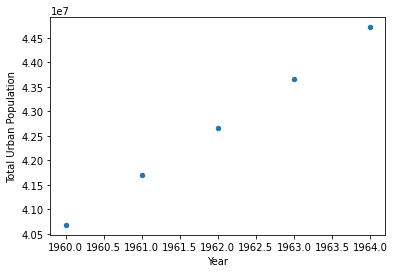

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01)  for tup in pops_list]

df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

<ipython-input-47-2ed716c8fab8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


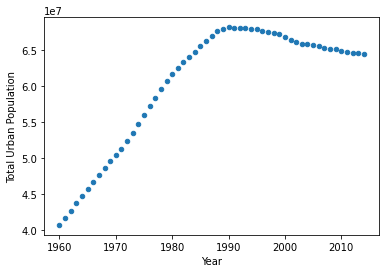

In [47]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


<ipython-input-48-087a2913fd2e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


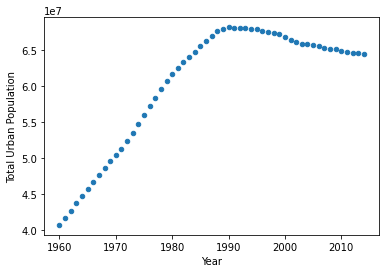

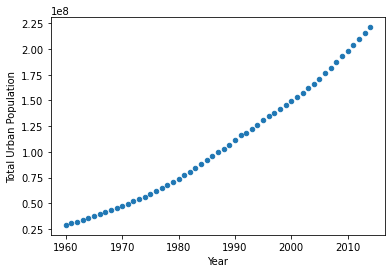

In [48]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
